# Lesson 12: Linear Models

The workhorse of statistical analysis is the linear model, particularly regression

1. Simple Linear Regression
2. Multiple Regression

## Simple Linear Regression

In its simplest form regression is used to determine the relationship between two variables. That is, given
one variable, it tells us what we can expect from the other variable.

The general idea behind simple linear regression is using the predictor to come up with some average
value of the response. The relationship is defined as

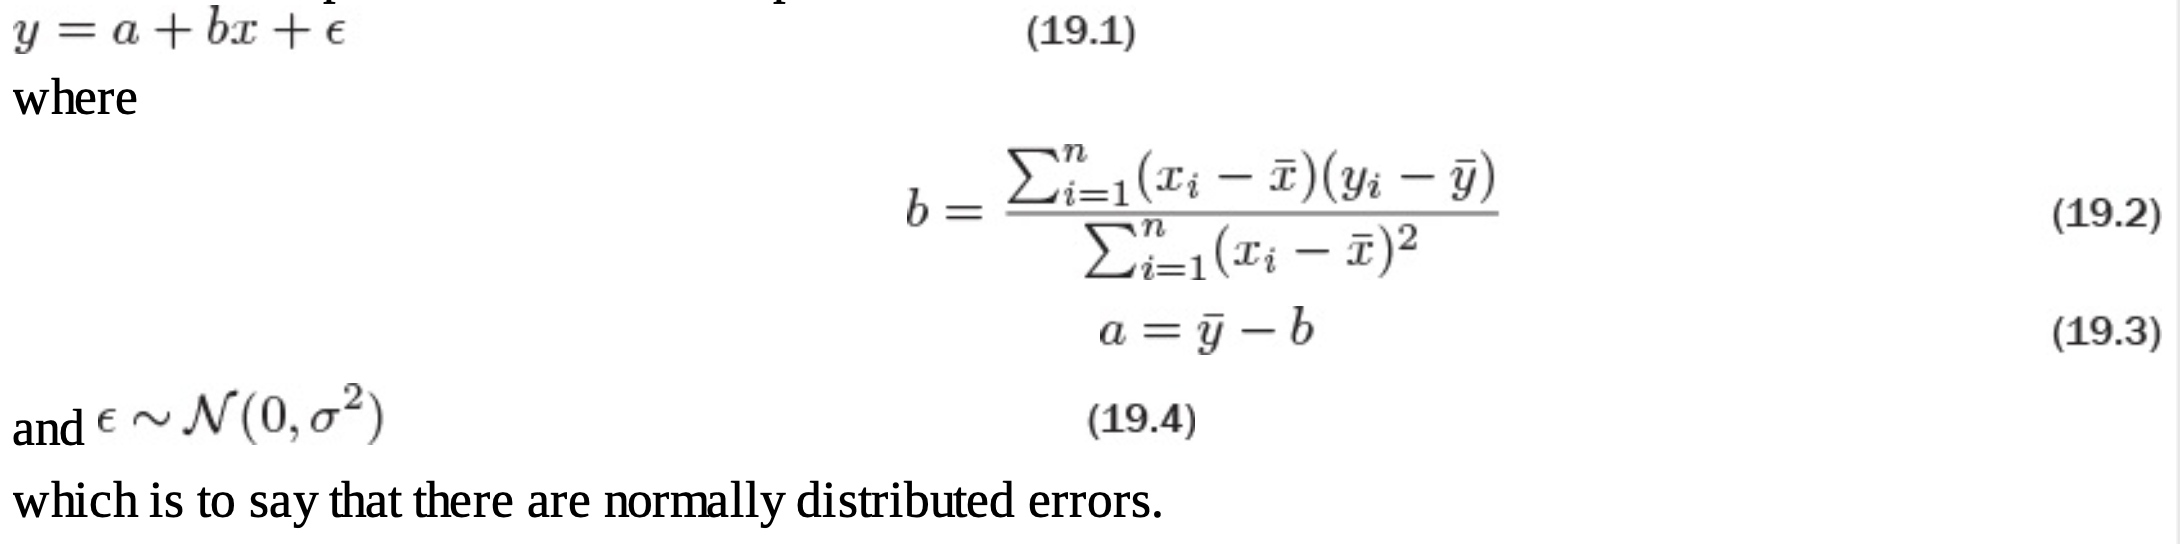

# Y = ß0 + ß1*x

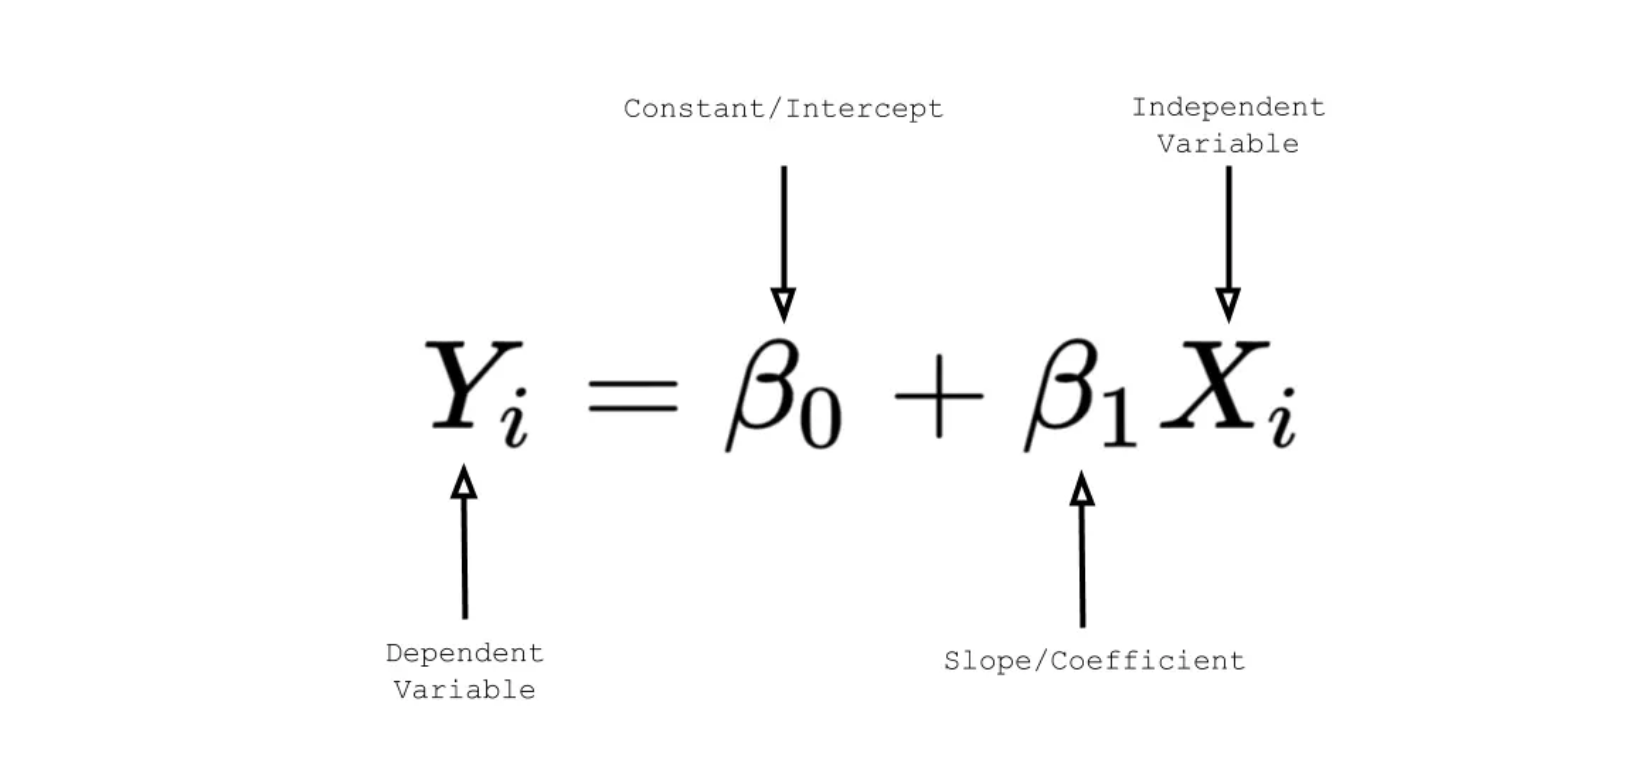

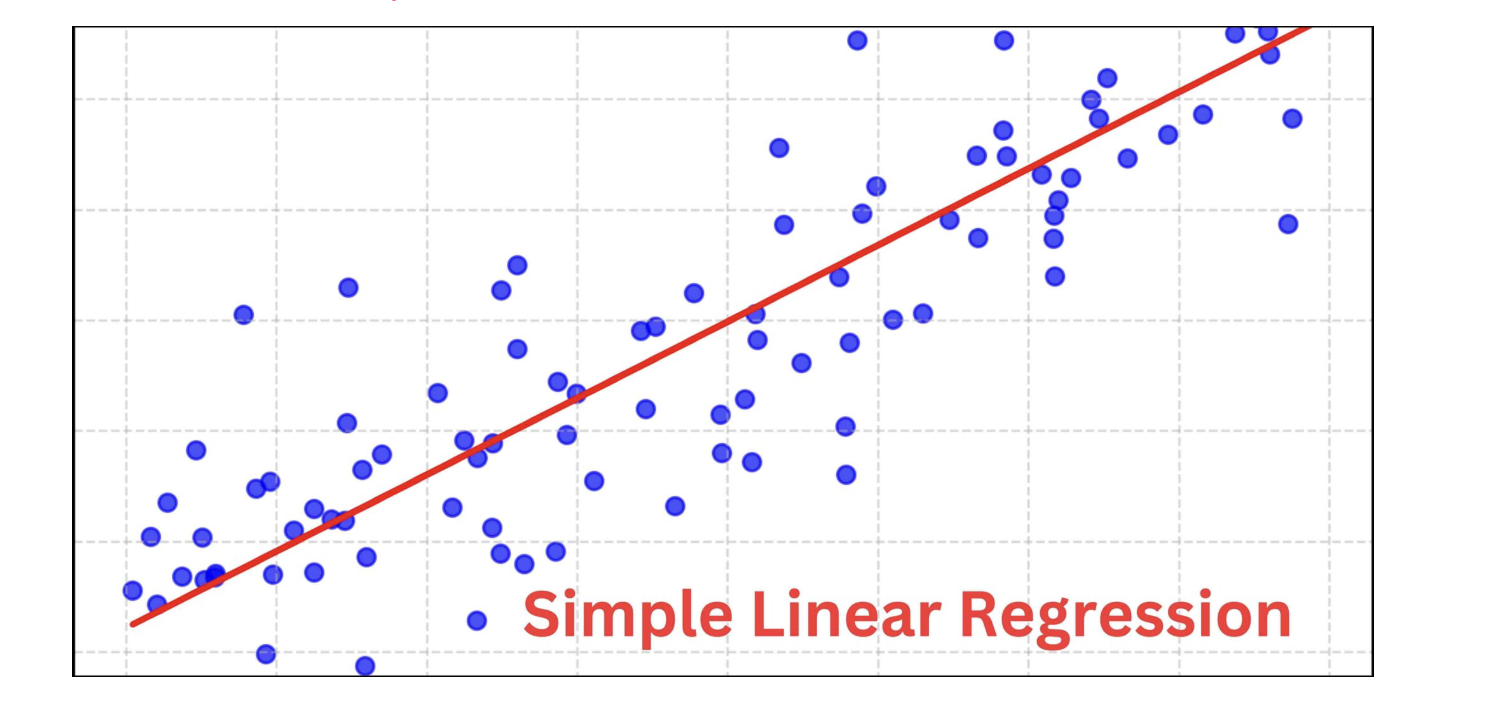

Linear Regression lines

Error

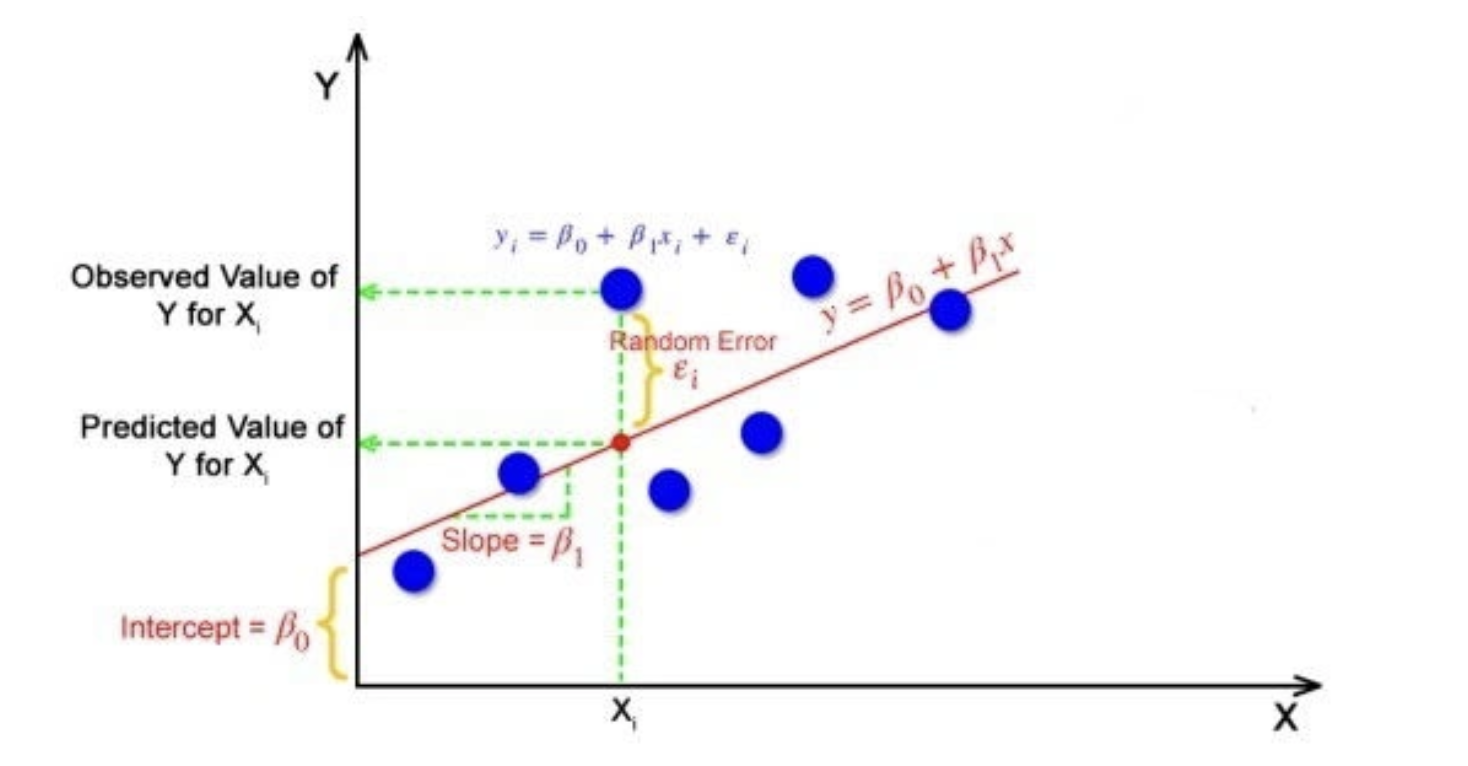

## Multiple Linear Regression

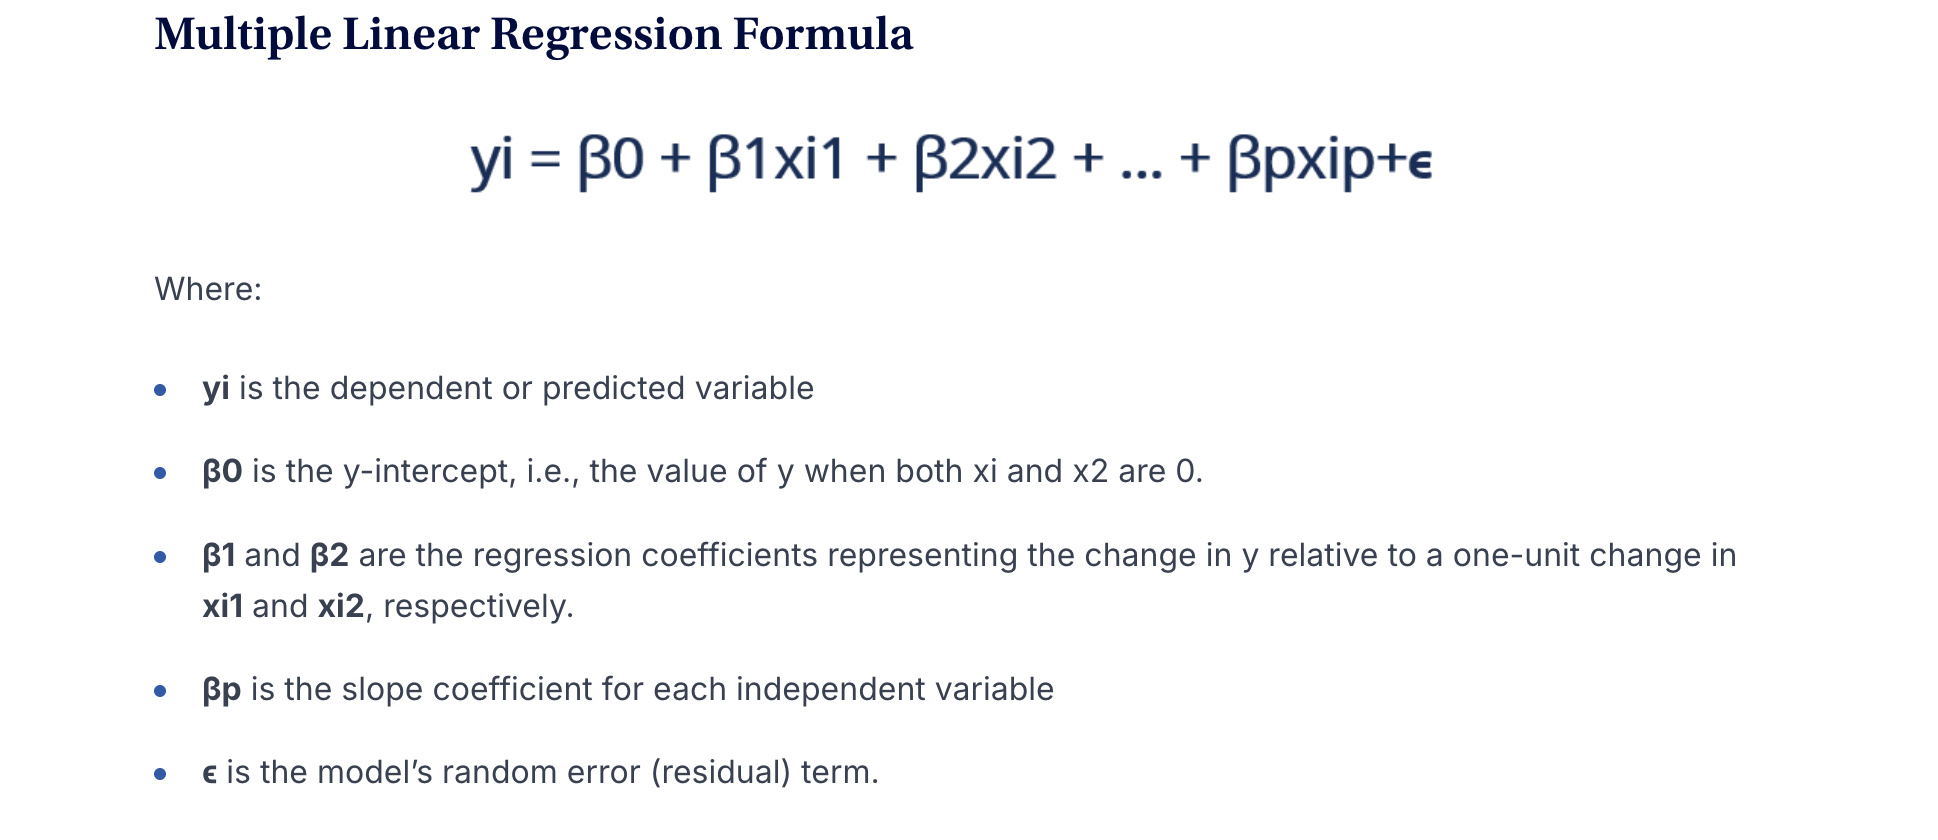

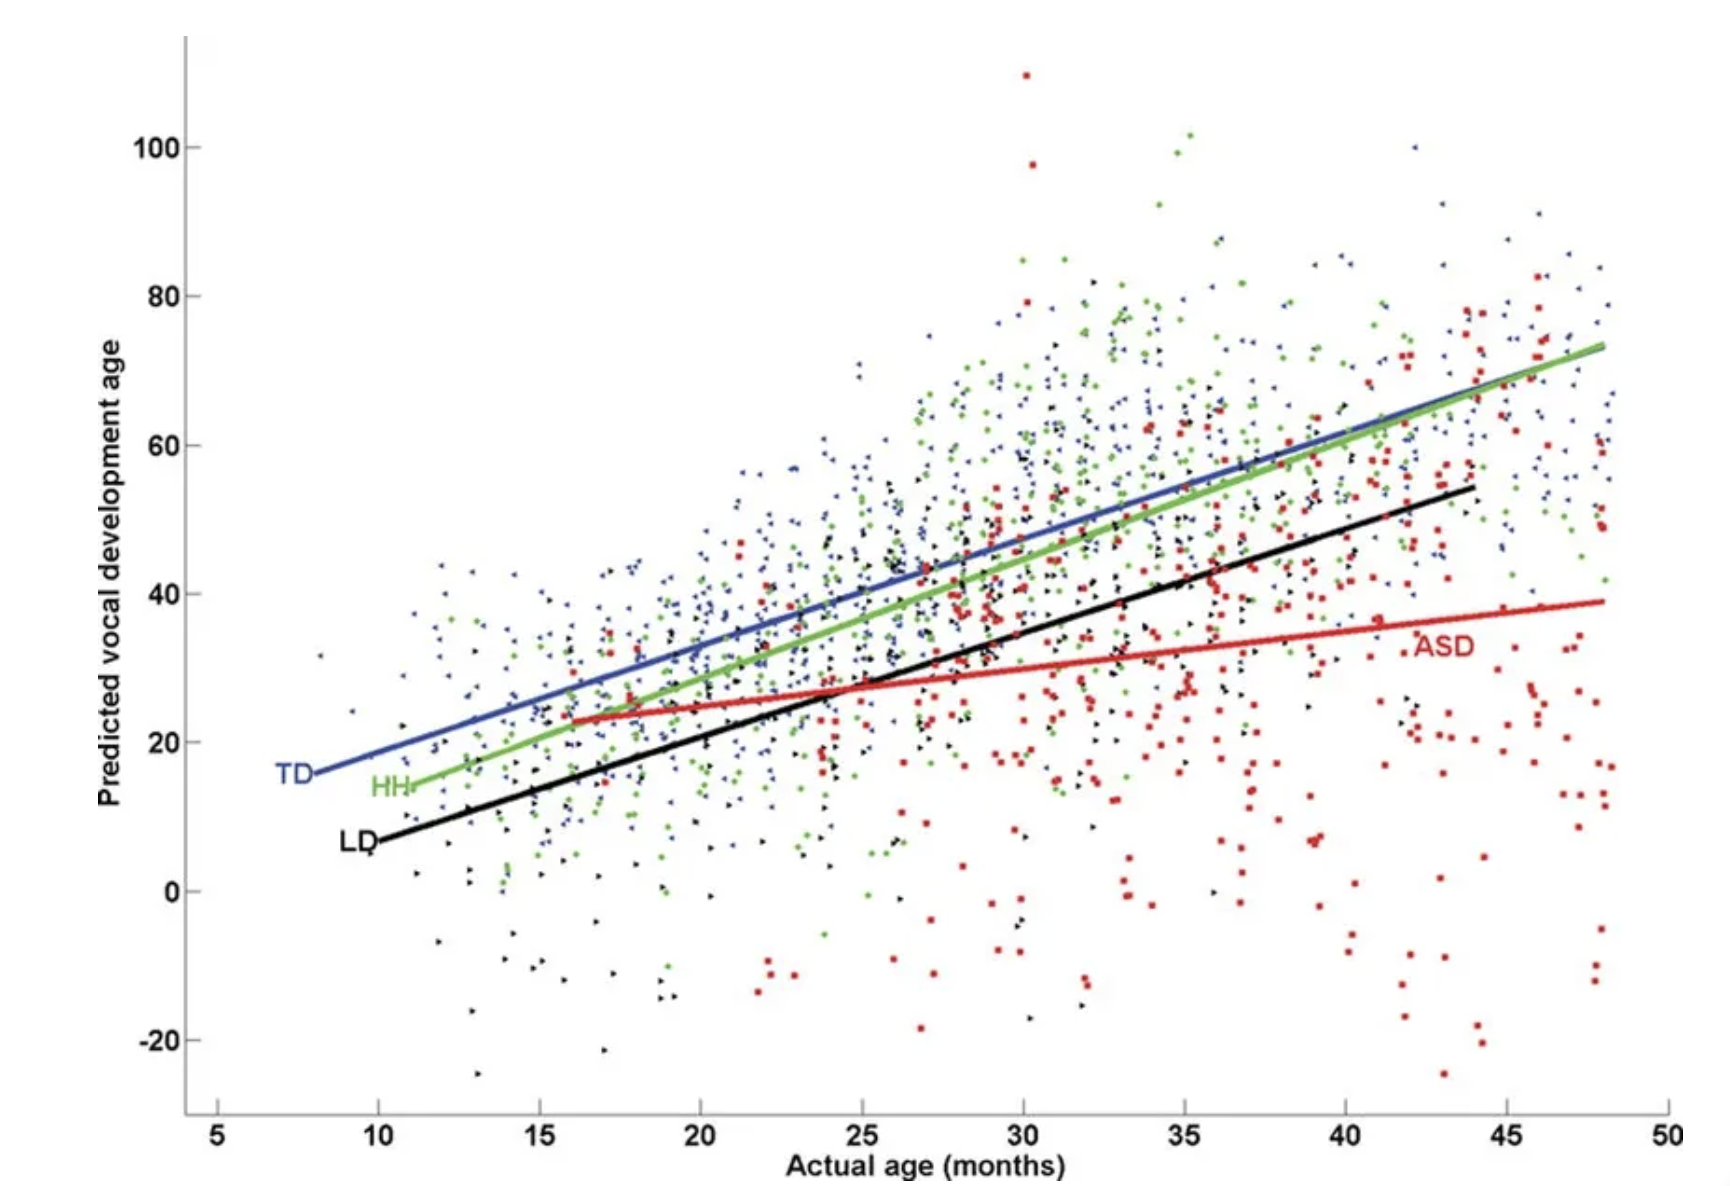

In [ ]:
df <- read.csv('/content/sample_data/all_gdp_refugees.csv')

In [ ]:
head(df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,Country.of.Origin,Country.of.Asylum.ISO,Refugees,Returned.Refugees,Asylum.Seekers,IDPs,Returned.IDPs,Stateless,HST,OOC
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,Afghanistan,-,2666294,61381,258862,1174306,123653,0,0,150369
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,Afghanistan,-,2624265,60541,333986,1837079,32649,0,0,448040
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,Afghanistan,-,2501447,383950,369072,1797551,0,0,0,114221
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,Afghanistan,-,2596259,17815,85407,805409,0,0,0,201361
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,Afghanistan,-,2887114,57577,30406,297129,7225,0,0,1479
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,Afghanistan,-,2556483,39665,75284,631286,21830,0,0,275817


Analyzing the relationship between edu_exp_gdp and Refugees
  Model: Refugees = 73038.83 + -8659.98 * edu_exp_gdp
  Interpretation: For every one-unit increase in edu_exp_gdp, the number of refugees is expected to change by approximately -8659.98.


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'



Analyzing the relationship between gdp_per_capita and Refugees
  Model: Refugees = 48297.69 + -1.02 * gdp_per_capita
  Interpretation: For every one-unit increase in gdp_per_capita, the number of refugees is expected to change by approximately -1.02.


`geom_smooth()` using formula = 'y ~ x'


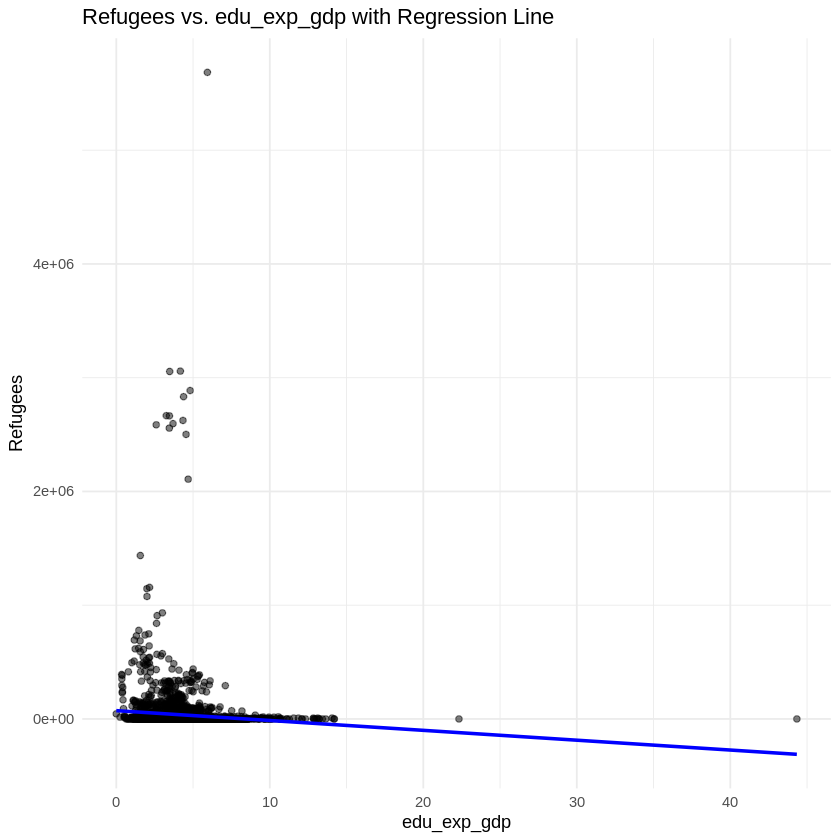


Analyzing the relationship between gov_exp_gdp and Refugees
  Model: Refugees = 26181.3 + -34.25 * gov_exp_gdp
  Interpretation: For every one-unit increase in gov_exp_gdp, the number of refugees is expected to change by approximately -34.25.


`geom_smooth()` using formula = 'y ~ x'


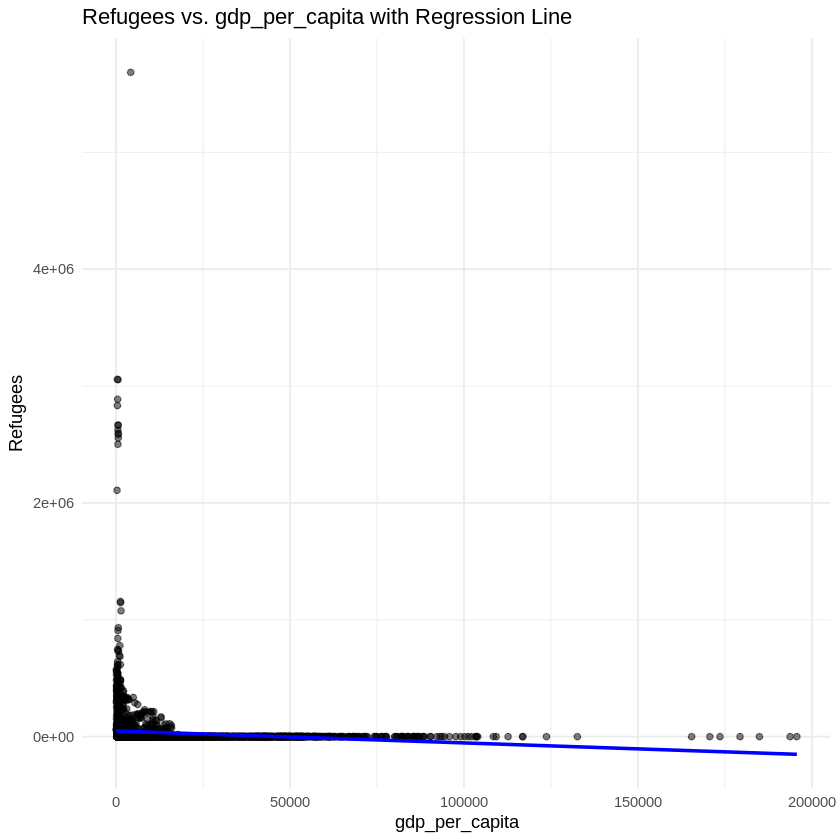


Analyzing the relationship between unemployment_rate and Refugees
  Model: Refugees = 40478.79 + -682.66 * unemployment_rate
  Interpretation: For every one-unit increase in unemployment_rate, the number of refugees is expected to change by approximately -682.66.


`geom_smooth()` using formula = 'y ~ x'


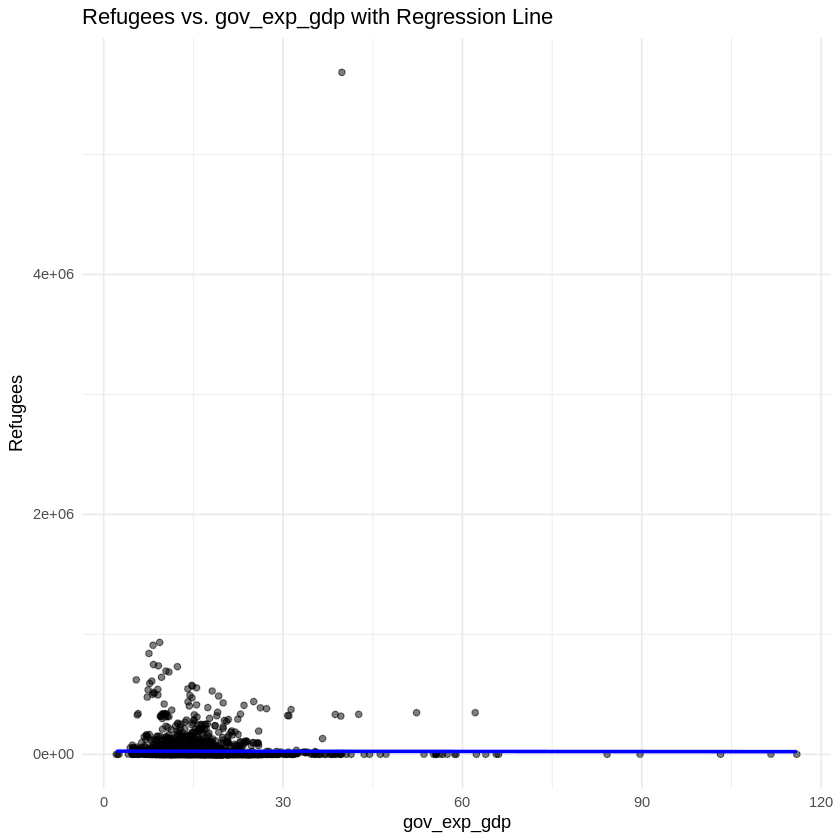


Analyzing the relationship between inflation_rate and Refugees
  Model: Refugees = 32080.61 + 461.01 * inflation_rate
  Interpretation: For every one-unit increase in inflation_rate, the number of refugees is expected to change by approximately 461.01.


`geom_smooth()` using formula = 'y ~ x'


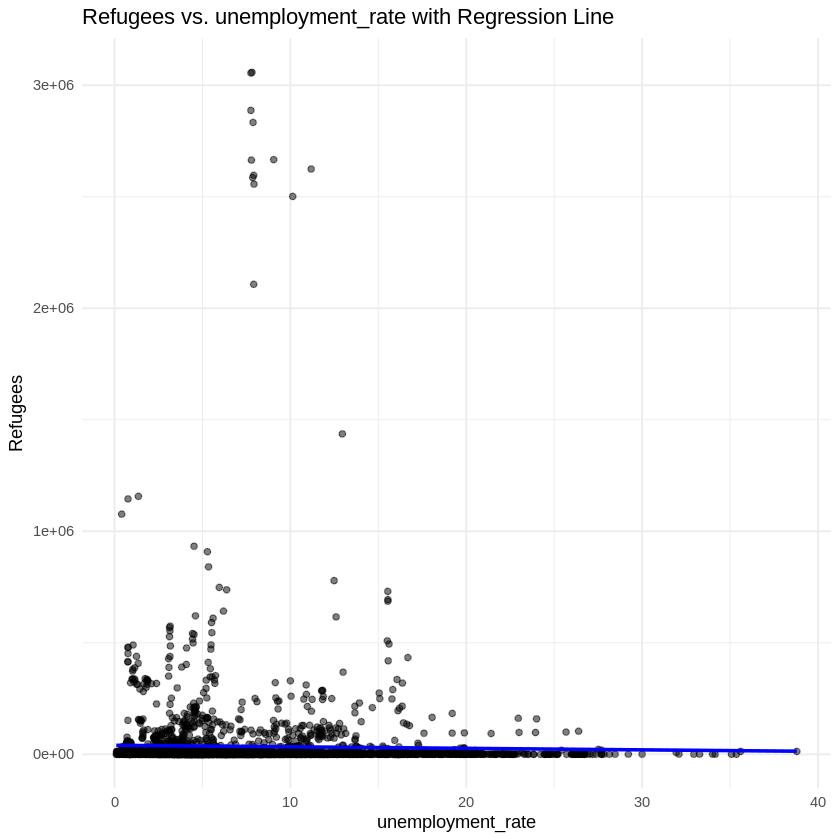

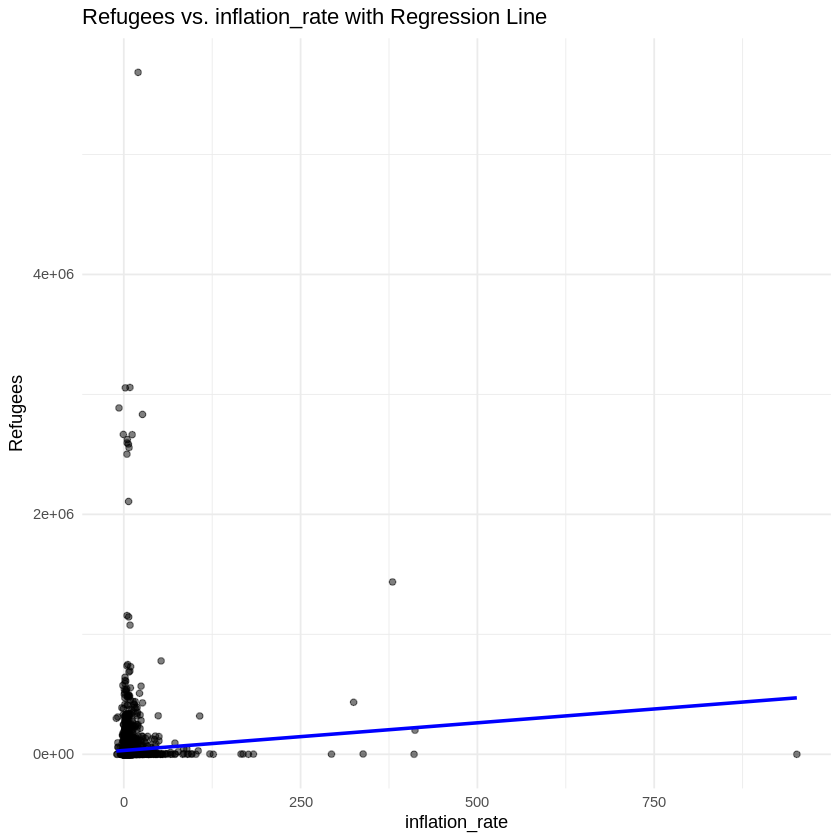

In [ ]:
# Simple Linear Regression to analyze the correlation between economic indicators and refugees, with visualization

# First, let's identify the economic indicator columns and the target variable (Refugees)
economic_indicators <- c('edu_exp_gdp', 'gdp_per_capita', 'gov_exp_gdp', 'unemployment_rate', 'inflation_rate')
target_variable <- 'Refugees'

# Load ggplot2 for visualization
library(ggplot2)

# Loop through each economic indicator and perform simple linear regression and visualization
for (indicator in economic_indicators) {
  cat(paste0("Analyzing the relationship between ", indicator, " and ", target_variable, "\n"))

  # Prepare the data for regression and visualization
  # We need to drop rows with missing values in either the indicator or the target variable
  temp_df <- na.omit(df[, c(indicator, target_variable)])

  # Check if there is enough data to perform regression
  if (nrow(temp_df) < 2) {
    cat(paste0("Not enough data to perform regression for ", indicator, ".\n\n"))
    next
  }

  # Create a linear regression model
  model <- lm(temp_df[[target_variable]] ~ temp_df[[indicator]], data = temp_df)

  # Get the coefficients
  coefficient <- coef(model)[2]
  intercept <- coef(model)[1]

  # Print the results
  cat(paste0("  Model: ", target_variable, " = ", round(intercept, 2), " + ", round(coefficient, 2), " * ", indicator, "\n"))
  cat(paste0("  Interpretation: For every one-unit increase in ", indicator, ", the number of refugees is expected to change by approximately ", round(coefficient, 2), ".\n"))

  # Create and display the scatter plot with the regression line
  plot_title <- paste("Refugees vs.", indicator, "with Regression Line")
  p <- ggplot(temp_df, aes_string(x = indicator, y = target_variable)) +
    geom_point(alpha = 0.5) + # Scatter plot of data points
    geom_smooth(method = "lm", se = FALSE, color = "blue") + # Add linear regression line
    labs(x = indicator, y = target_variable, title = plot_title) + # Add labels and title
    theme_minimal() # Use a minimal theme
  print(p) # Display the plot
  cat("\n") # Add a newline for better spacing between plots
}

## Explanation:
- We iterate through each economic indicator and perform simple linear regression and visualization.
 - na.omit() removes rows with missing values.
 - lm() performs the linear regression.
 - coef() extracts the coefficients from the model.
 - ggplot() creates the scatter plot.
 - geom_point() adds the data points.
 - geom_smooth(method = "lm", se = FALSE) adds the linear regression line without confidence intervals.
 - labs() adds titles and labels.
 - theme_minimal() sets a clean theme.
 - cat() is used to print the regression results and provide spacing.

In [ ]:
# Multiple Linear Regression to analyze the correlation between economic indicators and refugees

# Define the economic indicator columns and the target variable (Refugees)
economic_indicators <- c('edu_exp_gdp', 'gdp_per_capita', 'gov_exp_gdp', 'unemployment_rate', 'inflation_rate')
target_variable <- 'Refugees'

# Prepare the data for multiple regression
# We need to drop rows with missing values in any of the selected columns
model_df <- na.omit(df[, c(economic_indicators, target_variable)])

# Check if there is enough data to perform regression
if (nrow(model_df) < length(economic_indicators) + 1) {
  cat("Not enough data to perform multiple regression with the selected indicators.\n")
} else {
  # Create the multiple linear regression model formula
  model_formula <- as.formula(paste(target_variable, "~", paste(economic_indicators, collapse = " + ")))

  # Create the multiple linear regression model
  multi_model <- lm(model_formula, data = model_df)

  # Print the summary of the model
  cat("Multiple Linear Regression Model Summary:\n")
  print(summary(multi_model))
}

Multiple Linear Regression Model Summary:

Call:
lm(formula = model_formula, data = model_df)

Residuals:
   Min     1Q Median     3Q    Max 
-83024 -26965 -16795  -1540 704595 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.681e+04  3.998e+03  14.210  < 2e-16 ***
edu_exp_gdp       -7.562e+03  9.849e+02  -7.679 2.14e-14 ***
gdp_per_capita    -5.560e-01  7.093e-02  -7.838 6.23e-15 ***
gov_exp_gdp        4.806e+02  2.386e+02   2.014   0.0441 *  
unemployment_rate -3.151e+02  2.400e+02  -1.313   0.1893    
inflation_rate     1.916e+02  8.633e+01   2.220   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69380 on 3101 degrees of freedom
Multiple R-squared:  0.05859,	Adjusted R-squared:  0.05707 
F-statistic:  38.6 on 5 and 3101 DF,  p-value: < 2.2e-16



In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




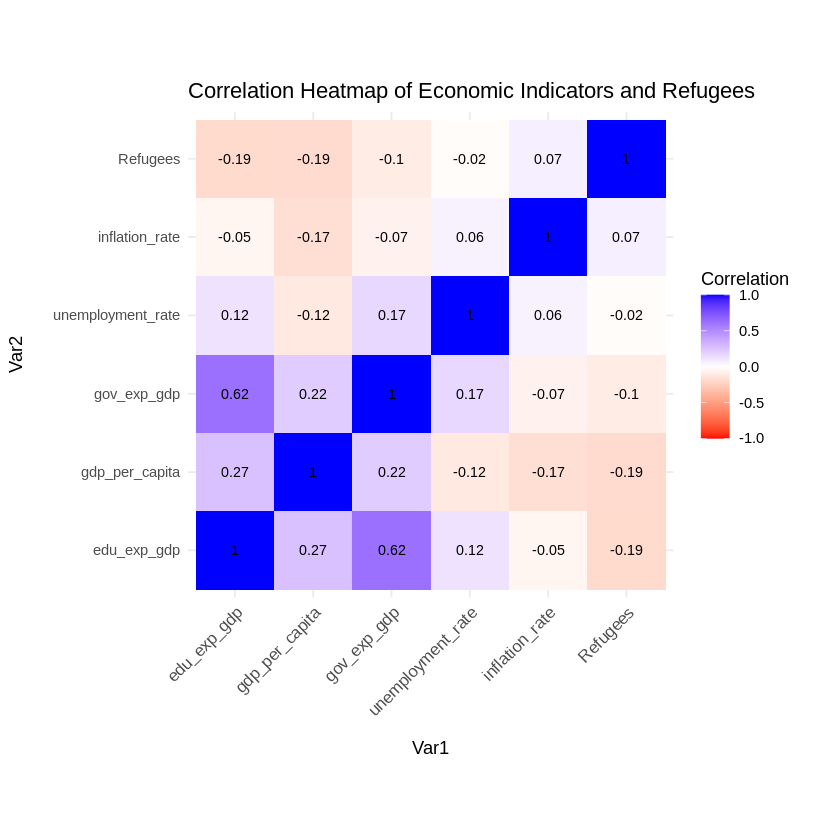

In [ ]:
# Plot a heatmap of the correlation matrix for the variables used in multiple linear regression

# Load necessary libraries
library(ggplot2)
library(reshape2) # For melting the correlation matrix

# Select the columns used in the multiple regression model
model_vars <- c(economic_indicators, target_variable)
correlation_data <- df[, model_vars]

# Calculate the correlation matrix, handling missing values
correlation_matrix <- cor(correlation_data, use = "complete.obs")

# Melt the correlation matrix for ggplot2
melted_correlation_matrix <- melt(correlation_matrix)

# Create the heatmap
ggplot(melted_correlation_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() + # Create the tiles for the heatmap
  scale_fill_gradient2(low = "red", high = "blue", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name="Correlation") + # Define the color scale
  theme_minimal() + # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                   size = 10, hjust = 1)) + # Adjust text for readability
  coord_fixed() + # Ensure square tiles
  geom_text(aes(Var2, Var1, label = round(value, 2)), color = "black", size = 3) + # Add correlation values as text
  labs(title = "Correlation Heatmap of Economic Indicators and Refugees") # Add a title

Explanation of the Model Summary:
- **Residuals:**  Show the distribution of the errors (the differences between the observed and predicted values).
- **Coefficients:**
  - **Estimate:** The estimated change in the target variable (Refugees) for a one-unit increase in the predictor variable, holding other predictors constant.
  - **Std. Error:** The standard error of the coefficient estimate, indicating the precision of the estimate.
  - **t value:** The test statistic for the hypothesis that the coefficient is zero. A larger absolute t-value suggests a stronger relationship.
  - **Pr(>|t|):** The p-value, which is the probability of observing a t-value as extreme as, or more extreme than, the calculated value if the null hypothesis (coefficient is zero) is true. Small p-values (typically < 0.05) indicate that the predictor is statistically significant.
- **Residual standard error:** A measure of the typical distance between the observed and predicted values.
- **Multiple R-squared:** The proportion of the variance in the target variable that is explained by the predictor variables. A higher R-squared indicates a better fit.
- **Adjusted R-squared:** A modified version of R-squared that accounts for the number of predictors in the model. It is useful for comparing models with different numbers of predictors.
- **F-statistic:** Tests the overall significance of the regression model. A significant F-statistic (small p-value) indicates that at least one of the predictors is related to the target variable.